In [1]:

import pandas as pd
from random import shuffle
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import csv
from collections import Counter
import random
import time
%matplotlib inline

In [2]:
#Reading data 
#while running please change the path of the file 
car_data = pd.read_csv("F:/Semester 2/Machine Learning/Assignment/car.csv",header = None,names = ['buying','maint','doors','persons','lug_boot','safety','class'])


In [3]:
#as all the columns are categorical, checking for unique values of each column
for i in car_data.columns:
    print(car_data[i].unique(),"\t",car_data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


# Online bagging for Car Dataset

In [4]:

global train_data
global train_class
global test_data
global test_class
global models
global kArr

#creating functions for precision, f1 score, recall and accuracy
def f1score(y_true,y_pred):
    f1=f1_score(y_true, y_pred, average= 'micro')
    return f1
def precision(y_true,y_pred):
    pre=precision_score(y_true, y_pred, average='micro')
    return pre
def recall(y_true,y_pred):
    recall=recall_score(y_true, y_pred, average='micro')
    return recall
def accuracy(y_true,y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

#Loading arriving data or online data
def LoadData1(path):
    global train_data
    global train_class
    global test_data
    global test_class
    #data encoding
    data = []
    with open(path) as csvfile:
        data1 = csv.reader(csvfile, delimiter=',', quotechar='|')
        for each in data1:
            X = []
            for x in each:
                
                #Applying hot encoding directly to the data coming in 
                if (x == "vhigh" or x == "5more" or x == "more"):
                    x=3
                elif (x == "high" or x == "big" or x == "4"):
                    x=2
                elif (x == "med" or x == "3"):
                    x=1
                elif (x == "low" or x == "small" or x == "2"):
                    x=0
                X.append(x)
                Y = X
                
            #creating copies of the training data
            if (Y[-1] == "acc"):
                for i in range(3): 
                    data.append(Y)
            elif (Y[-1] == "good"):
                for i in range(10):
                    data.append(Y)
            elif (Y[-1] == "vgood"):
                for i in range(10):
                    data.append(Y)
            else:
                data.append(Y)
        #splitting data into training and test set       
    shuffle(data)
    size = int(len(data) * 0.7)
    train_data = data[0:size]
    test_data = data[size:len(data)]
    train_class = np.array(train_data)[:, len(train_data[0]) - 1]
    train_data = np.array(train_data)[:, range(0, len(train_data[0]) - 1)]
    test_class = np.array(test_data)[:, len(test_data[0]) - 1]
    test_data = np.array(test_data)[:, range(0, len(test_data[0]) - 1)]
    train_data = [[int(j) for j in i] for i in train_data]
    test_data = [[int(j) for j in i] for i in test_data]
    
def addModels():
    global models
    for i in range(0,100):
     #creating base model classifier
        models.append(MultinomialNB()) #linear_model.Perceptron()
        
def fit(data,classdata):
    global models
   # global kArr
    global train_class
    for i in range(0, 100):
        k = np.random.poisson(1,1)[0] #applying poisson distribution for the number of times training data stored
        if (k>999):
            k = 999
        kArr[k]+=1
        #fitting training and test data to the model
        for j in range(0,k):
            models[i].partial_fit(data, classdata, classes =["vgood","good","acc","unacc"])


def predict(test_data):
    prediction = []
    for i in range(0, 100):
        prediction.append(models[i].predict(test_data))
    prediction = np.array(prediction).transpose()
    Final = []
    for each in prediction:
        Final.append(Counter(each).most_common(1)[0][0])
    #calculating general statistics by calling function
    print ("Precision is ", precision(test_class, np.array(Final)))
    print ("Recall is ", recall(test_class, np.array(Final)))
    print ("F1 score is ", f1score(test_class, np.array(Final)))
    print ("Accuracy is ", accuracy(test_class, np.array(Final)))
    
def main():
    global models
    global  kArr
    models = []
    kArr = [0]*1000
    #while running please change the path of the file 
    LoadData1("F:/Semester 2/Machine Learning/Assignment/car.txt.DATA")
    addModels()
    
    start = 0
    end = len(train_data)
    offset = 20 #processing 20 chunks of data at a time
    count = 0
    start_time = time.time()
    while(start < end):
        if (count%20 == 0):
            print (count)
        count += 1
        
        data = train_data[start:start + offset]
        classdata = train_class[start:start + offset]
        start += offset
        fit(data,classdata)
    predict(test_data)
    print("time taken for online bagging", time.time()-start_time)

if __name__ == "__main__":main()


0
20
40
60
80
100
120
Precision is  0.6543654365436543
Recall is  0.6543654365436543
F1 score is  0.6543654365436543
Accuracy is  0.6543654365436543
time taken for online bagging 13.04143476486206


# Implementing batch algorithms for car dataset

In [5]:
#Reading data 
#while running please change the path of the file 
car_data = pd.read_csv("F:/Semester 2/Machine Learning/Assignment/car.csv",header = None,names = ['buying','maint','doors','persons','lug_boot','safety','class'])

## Data preprocessing

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
#as all the columns are categorical, checking for unique values of each column
for i in car_data.columns:
    print(car_data[i].unique(),"\t",car_data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [8]:
#Checking how these unique categories are distributed among the columns
for i in car_data.columns:
    print(car_data[i].value_counts())
    print()

vhigh    432
high     432
low      432
med      432
Name: buying, dtype: int64

vhigh    432
high     432
low      432
med      432
Name: maint, dtype: int64

2        432
3        432
5more    432
4        432
Name: doors, dtype: int64

2       576
more    576
4       576
Name: persons, dtype: int64

big      576
small    576
med      576
Name: lug_boot, dtype: int64

high    576
low     576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



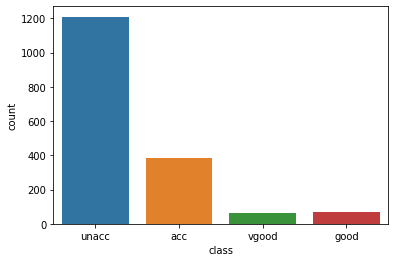

In [9]:
sns.countplot(car_data['class'])


As scikit-learn algorithms do not generally work with string values, I've converted string categories to integers

## Data encoding

In [10]:
#Mapping classifiers to their intinsity
car_data['buying'] = car_data['buying'].map({'vhigh' : 3,'high' : 2, 'med' : 1, 'low' : 0})
car_data['maint'] = car_data['maint'].map({'vhigh' : 3,'high' : 2, 'med' : 1, 'low' : 0})
car_data['doors'] = car_data['doors'].map({'5more' : 5, '2' : 2,'3' : 3, '4' : 4})
car_data['persons'] = car_data['persons'].map({'more' : 5, '2' : 2, '4' : 4})
car_data['lug_boot'] = car_data['lug_boot'].map({'small' : 0,'med' : 1, 'big' : 2})
car_data['safety'] = car_data['safety'].map({'low' : 0,'med' : 1, 'high' : 2})
car_data['class'] = car_data['class'].map({'unacc' : 0,'acc' : 1,'good' : 2,'vgood' : 3})

## Modeling

In [12]:
#Converting 70% data to trainig and rest for testing
train =car_data.sample(frac = 0.7)
test = car_data.loc[car_data.index.isin(train.index)]
train.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
1598,0,1,5,2,1,2,0
1603,0,1,5,4,0,1,1
459,2,3,3,2,0,0,0
616,2,2,4,5,1,1,1
1693,0,0,4,5,0,1,1
1587,0,1,4,5,1,0,0
53,3,3,3,5,2,2,0
602,2,2,4,2,2,2,0
1246,1,0,4,2,1,1,0
280,3,1,4,4,0,1,0


X is the dataframe containing input data / features y is the series which has results which are to be predicted

In [14]:
#Data Training
x_train = train[train.columns[0:6]]
y_train  = train[train.columns[6]]
x_test = test[test.columns[0:6]]
y_test = test[test.columns[6]]
x_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
1598,0,1,5,2,1,2
1603,0,1,5,4,0,1
459,2,3,3,2,0,0
616,2,2,4,5,1,1
1693,0,0,4,5,0,1
1587,0,1,4,5,1,0
53,3,3,3,5,2,2
602,2,2,4,2,2,2
1246,1,0,4,2,1,1
280,3,1,4,4,0,1


In [15]:
#Decision Tree
start_time = time.time()
classifiers = {}
clf = tree.DecisionTreeClassifier()
clf.set_params(max_leaf_nodes = 50,max_depth = 10, max_features = None)
dt_clf = clf.fit(x_train,y_train)
dt_predict = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test,dt_predict)
param =  dt_clf.get_params()
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())#,f_score.mean())#, "-", recall.mean(), "-", precision_score.mean())
print ("F1 score is",  f_score.mean())
classifiers["DT"]=clf 
t0 =  time.time()-start_time
print("Time taken for decision tree",t0)


Accuracy is 0.9793236093992155
F1 score is 0.9768236093992154
Time taken for decision tree 0.18439722061157227


In [18]:
#Support Vector Machines
start_time = time.time()
clf = svm.SVC(gamma = 'auto')
clf.set_params(C = 100, kernel = "rbf")
svm_clf = clf.fit(x_train,y_train)
svm_predict = svm_clf.predict(x_test)
svm_acc = accuracy_score(y_test,svm_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["SVM"]=clf
t1 =  time.time()-start_time
print("Time taken for SVM",t1)

Accuracy is 0.9859955023589071
F1 score is 0.9859955023589071
Time taken for SVM 0.9864838123321533


In [19]:
#Bagging
start_time = time.time()
clf = BaggingClassifier()
clf.set_params(n_estimators = 30,max_samples = 1000)
bg_clf = clf.fit(x_train,y_train)
bg_predict = bg_clf.predict(x_test)
bg_acc = accuracy_score(y_test,bg_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["BG"]=clf
t2 =  time.time()-start_time
print("Time taken for Bagging",t2)

Accuracy is 0.9851492790424932
F1 score is 0.9834619566374109
Time taken for Bagging 1.8474836349487305


In [20]:
#Random Forest Classifier
start_time = time.time()
clf = RandomForestClassifier()
clf.set_params(n_estimators = 100, max_depth = 10)
rf_clf = clf.fit(x_train,y_train)
rf_predict = rf_clf.predict(x_test)
rf_acc = accuracy_score(y_test,rf_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["RF"]=clf
t3 =  time.time()-start_time
print("Time taken for Random forest",t3)

Accuracy is 0.9751561715134439
F1 score is 0.9768028380934128
Time taken for Random forest 4.833299398422241


In [21]:
#AdaBoost
start_time = time.time()
clf = AdaBoostClassifier()
clf.set_params(n_estimators = 10, learning_rate = 1)
ada_clf = clf.fit(x_train,y_train)
ada_predict = ada_clf.predict(x_test)
ada_acc = accuracy_score(y_test,ada_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["ADA"]=clf
t4 =  time.time()-start_time
print("Time taken for Adaboost",t4)


Accuracy is 0.8554744530695675
F1 score is 0.8554744530695675
Time taken for Adaboost 0.8078839778900146


In [22]:
#Perceptron
start_time = time.time()
clf = linear_model.Perceptron()
clf.set_params(alpha = 0.0001)
pt_clf = clf.fit(x_train,y_train)
pt_predict = pt_clf.predict(x_test)
pt_acc = accuracy_score(y_test,pt_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["PT"]=clf
t5 =  time.time()-start_time
print("Time taken for Perceptron",t5)

Accuracy is 0.7643918139666732
F1 score is 0.7643918139666732
Time taken for Perceptron 0.30675649642944336


In [23]:
#Multinomial Naive Bayes
start_time = time.time()
clf = MultinomialNB()
clf.set_params(alpha = 0.1)
nb_clf = clf.fit(x_train,y_train)
nb_predict = nb_clf.predict(x_test)
nb_acc = accuracy_score(y_test,nb_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["NB"]=clf
t6 =  time.time()-start_time
print("Time taken for Naive bayes",t6)

Accuracy is 0.7108394982893718
F1 score is 0.7108394982893718
Time taken for Naive bayes 0.15760064125061035


In [624]:
print ("   accuracy","           ","F-score",)
for clf in classifiers.values():
    accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
    f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
    n = len(t)
    for i in classifiers:
        if classifiers[i]== clf:
            print (i),
            break
    print ( "  ",accuracy.mean(), "  ",f_score.mean())
    

   accuracy             F-score
DT
   0.9561983471074379    0.9537190082644628
SVM
   0.9818181818181818    0.9818181818181818
BG
   0.9727272727272729    0.9776859504132233
RF
   0.9719008264462812    0.9768595041322315
ADA
   0.8314049586776859    0.8314049586776859
PT
   0.7644628099173554    0.7644628099173555
NB
   0.7057851239669422    0.7057851239669423


In [24]:
t = [t0,t1,t2,t3,t4,t5,t6]
b = enumerate(t)
for i in b:
    print(i)
    #0 - Decision tree
    #1 - SVM
    #2 - Bagging
    #3 - Random forest
    #4 - AdaBoost
    #5 - Perceptron
    #6 - Naive Bayes

(0, 0.18439722061157227)
(1, 0.9864838123321533)
(2, 1.8474836349487305)
(3, 4.833299398422241)
(4, 0.8078839778900146)
(5, 0.30675649642944336)
(6, 0.15760064125061035)
